<a href="https://colab.research.google.com/github/BenGreenleaf/IA-IB-Google-Colab-Investigations/blob/main/Materials_Characterisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import *
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


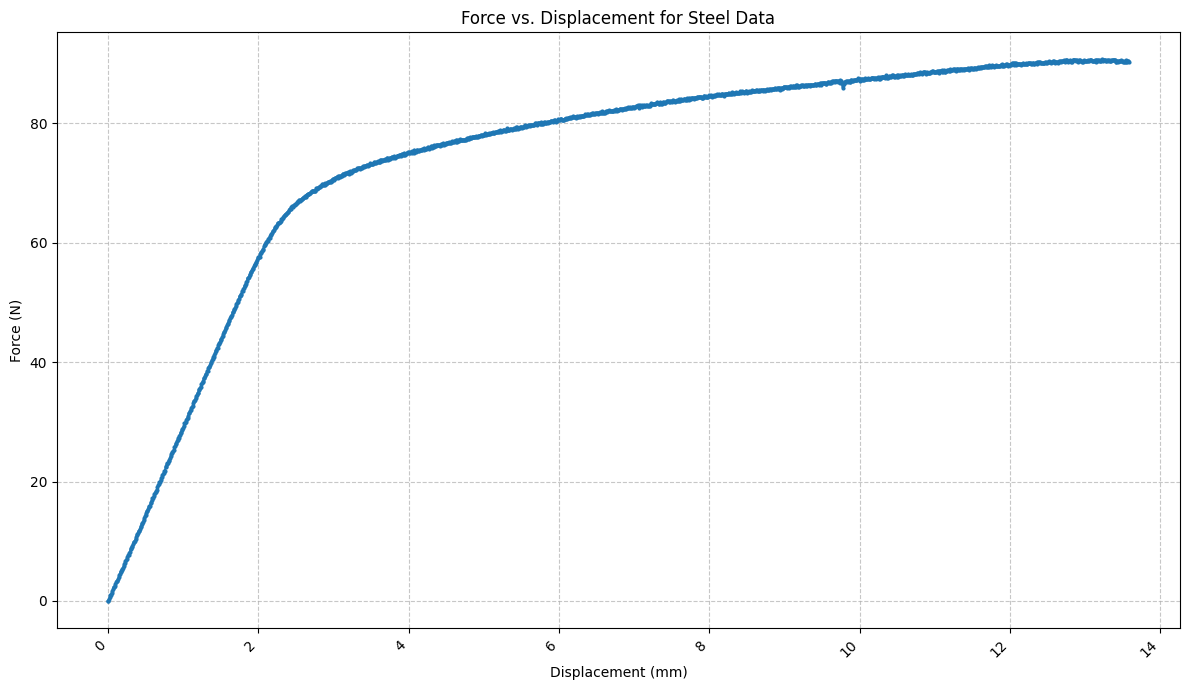

In [ ]:
steel_data = open('/content/drive/MyDrive/133_steel_data_1.csv', 'r')

steel_length = 200
steel_width = 24.96
steel_height = 1.11

restraint_length = 100*(10**-3)

steel_i = ((steel_width)*(steel_height**3)/12)*(10**-12)

steel_displacements = []
steel_forces = []

for line in steel_data:
  try:
    parts = line.split(",")
    if len(parts) > 2 and parts[1].strip() != '' and parts[2].strip() != '':
      displacement_str = parts[1].strip().strip('"')
      force_str = parts[2].strip().strip('"')

      displacement = float(displacement_str)
      force = float(force_str)

      steel_displacements.append(displacement)
      steel_forces.append(force)
  except ValueError:
    pass
  except IndexError:
    pass

steel_data.close() # Close the file after reading

plt.figure(figsize=(12, 7)) # Make the plot larger for better readability
plt.plot(steel_displacements, steel_forces, marker='o', markersize=2, linestyle='-') # Added marker and linestyle for clarity
plt.xlabel("Displacement (mm)") # Add x-axis label
plt.ylabel("Force (N)") # Add y-axis label
plt.title("Force vs. Displacement for Steel Data") # Add a more descriptive title
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels and align them to the right
plt.yticks(rotation=0) # Ensure y-axis labels are not rotated
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

29.236317758269543 -0.18718532057624648
Youngs Modulus in GPa: 214116021292.2938


Text(0.5, 1.0, 'Force vs. Displacement for Steel Data')

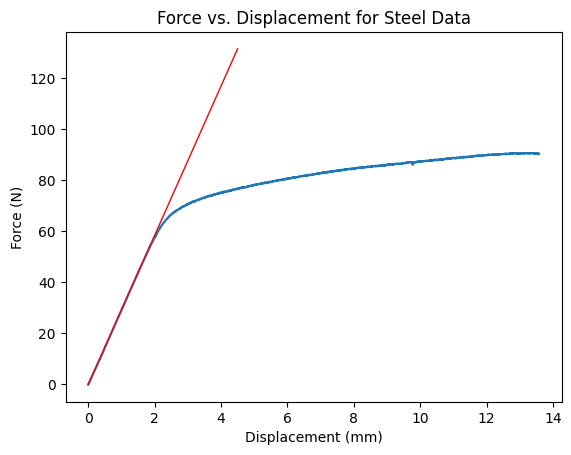

In [ ]:
steel_displacements = np.array(steel_displacements)
steel_forces = np.array(steel_forces)

safe_upper_bound = 1.0

linear_region_steel = (steel_displacements <= safe_upper_bound)
grad_steel,intercept_steel = np.polyfit(steel_displacements[linear_region_steel], steel_forces[linear_region_steel], 1)
print(grad_steel,intercept_steel)

E = (grad_steel*(10**3))*((restraint_length**3)/(48*steel_i))

print("Youngs Modulus in GPa: "+str(E))

xs = np.linspace(0, 4.5, 100)
ys = grad_steel * xs + intercept_steel

plt.plot(steel_displacements, steel_forces, marker='o', markersize=0.01, linestyle='-')
plt.plot(xs,ys, color='red', linewidth=1.0)
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.title("Force vs. Displacement for Steel Data")





In [ ]:
resolution = 0.01

for point in range(0,len(steel_displacements)):
  actual_value = grad_steel*(steel_displacements[point]) + intercept_steel
  if (abs(actual_value-steel_forces[point])/actual_value) >= resolution and steel_displacements[point] > safe_upper_bound:
    print(actual_value, steel_forces[point])
    print("Failure Displacement: "+str(steel_displacements[point]))
    print("Failure Load: "+str(steel_forces[point]))

    yield_stress = (steel_forces[point]*steel_length*steel_height)*(10**-6)/(8*steel_i)
    print("Yield Stress in MPa: "+str(yield_stress))

    break


56.58857431327287 56.02231
Failure Displacement: 1.94196
Failure Load: 56.02231
Yield Stress in MPa: 546501965.843182


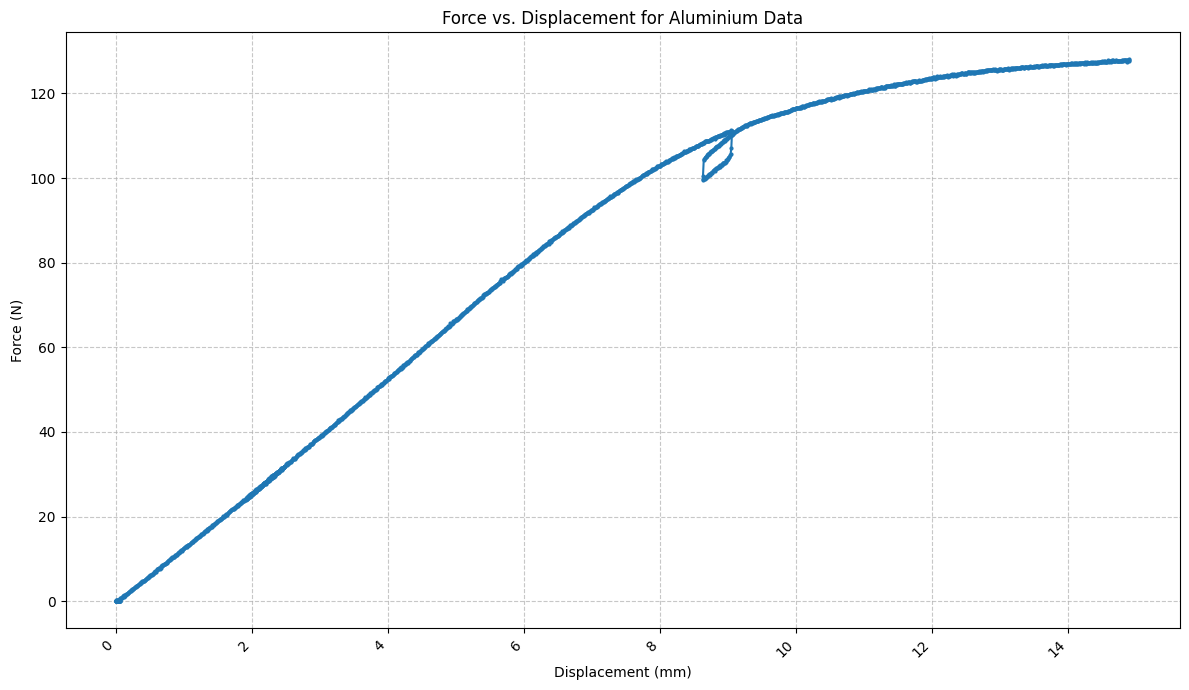

In [ ]:
al_data = open('/content/drive/MyDrive/136_alumimium_1.csv', 'r')

al_length = 200
al_width = 25.2
al_height = 1.15

al_i = ((al_width)*(al_height**3)/12)*(10**-12)

al_displacements = []
al_forces = []

offset = 0

for line in al_data:
  try:
    parts = line.split(",")
    if len(parts) > 2 and parts[1].strip() != '' and parts[2].strip() != '':
      displacement_str = parts[1].strip().strip('"')
      force_str = parts[2].strip().strip('"')

      displacement = float(displacement_str)
      force = float(force_str)

      if force < 0:
        offset = displacement
      else:
        al_displacements.append(displacement-offset)
        al_forces.append(force)
  except ValueError:
    pass
  except IndexError:
    pass

al_data.close() # Close the file after reading

plt.figure(figsize=(12, 7)) # Make the plot larger for better readability
plt.plot(al_displacements, al_forces, marker='o', markersize=2, linestyle='-') # Added marker and linestyle for clarity
plt.xlabel("Displacement (mm)") # Add x-axis label
plt.ylabel("Force (N)") # Add y-axis label
plt.title("Force vs. Displacement for Aluminium Data") # Add a more descriptive title
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels and align them to the right
plt.yticks(rotation=0) # Ensure y-axis labels are not rotated
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

13.07851795385996 -0.5705854322143395
Youngs Modulus in GPa: 85310891377.14404


Text(0.5, 1.0, 'Force vs. Displacement for Aluminium Data')

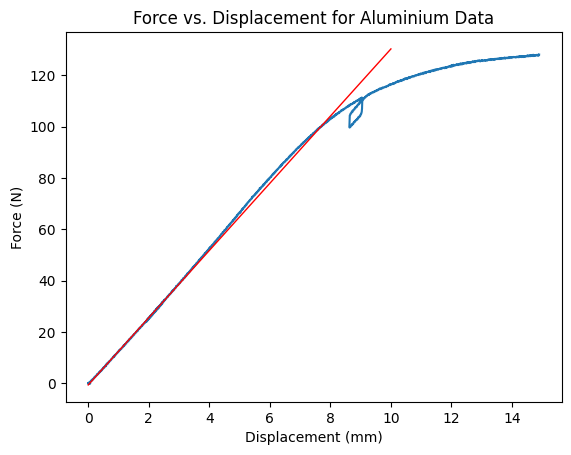

In [ ]:
al_displacements = np.array(al_displacements)
al_forces = np.array(al_forces)

safe_upper_bound = 3.5

linear_region_al = (al_displacements <= safe_upper_bound)
grad_al,intercept_al = np.polyfit(al_displacements[linear_region_al], al_forces[linear_region_al], 1)
print(grad_al,intercept_al)

E = (grad_al*(10**3))*((restraint_length**3)/(48*al_i))

print("Youngs Modulus in GPa: "+str(E))

xs = np.linspace(0, 10, 100)
ys = grad_al * xs + intercept_al

plt.plot(al_displacements, al_forces, marker='o', markersize=0.01, linestyle='-')
plt.plot(xs,ys, color='red', linewidth=1.0)
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.title("Force vs. Displacement for Aluminium Data")


In [ ]:
resolution = 0.02

for point in range(0,len(al_displacements)):
  actual_value = grad_al*(al_displacements[point]) + intercept_al
  if (abs(actual_value-al_forces[point])/actual_value) >= resolution and al_displacements[point] > safe_upper_bound:
    print(actual_value, al_forces[point])
    print("Failure Displacement: "+str(al_displacements[point]))
    print("Failure Load: "+str(al_forces[point]))

    yield_stress = (al_forces[point]*al_length*al_height)*(10**-6)/(8*al_i)
    print("Yield Stress in MPa: "+str(yield_stress))

    break

54.1623582787919 55.24824
Failure Displacement: 4.18495
Failure Load: 55.24824
Yield Stress in MPa: 497328652.4439644


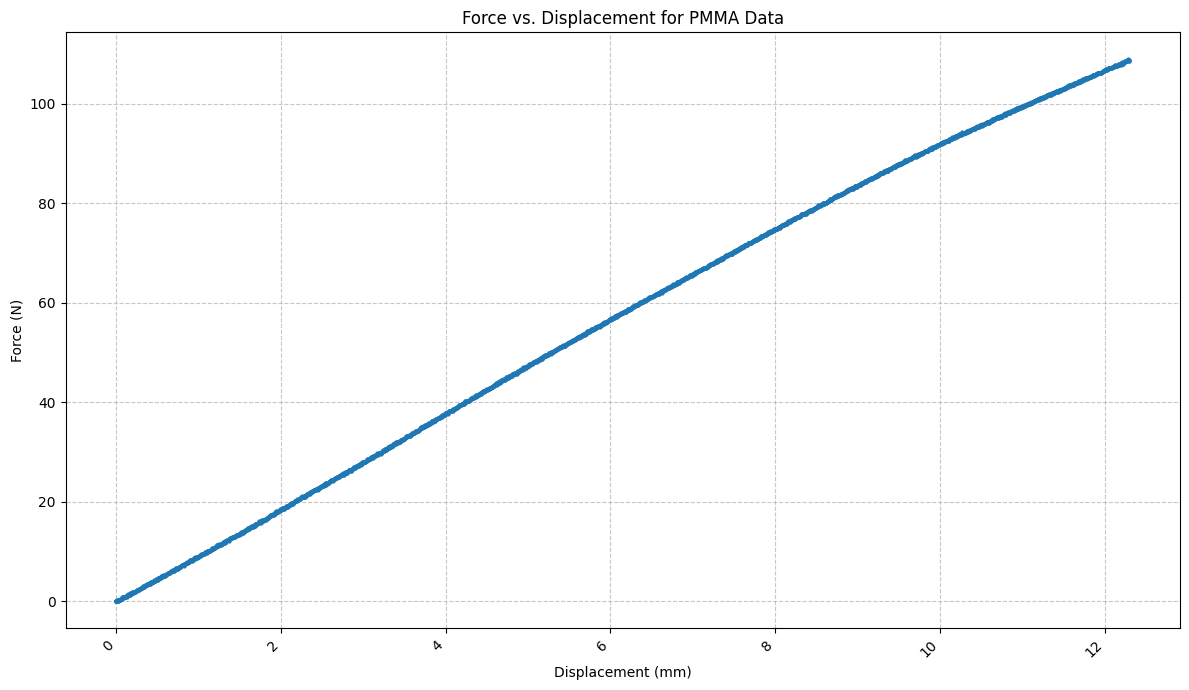

In [ ]:
pmma_data = open('/content/drive/MyDrive/PMMA_136_4_1.csv', 'r')

pmma_length = 200
pmma_width = 26
pmma_height = 3

pmma_i = ((pmma_width)*(pmma_height**3)/12)*(10**-12)

pmma_displacements = []
pmma_forces = []

offset = 0

for line in pmma_data:
  try:
    parts = line.split(",")
    if len(parts) > 2 and parts[1].strip() != '' and parts[2].strip() != '':
      displacement_str = parts[1].strip().strip('"')
      force_str = parts[2].strip().strip('"')

      displacement = float(displacement_str)
      force = float(force_str)

      if force < 0:
        offset = displacement
      elif displacement > 12.5:
        pass
      else:
        pmma_displacements.append(displacement-offset)
        pmma_forces.append(force)
  except ValueError:
    pass
  except IndexError:
    pass

pmma_data.close() # Close the file after reading

plt.figure(figsize=(12, 7)) # Make the plot larger for better readability
plt.plot(pmma_displacements, pmma_forces, marker='o', markersize=2, linestyle='-') # Added marker and linestyle for clarity
plt.xlabel("Displacement (mm)") # Add x-axis label
plt.ylabel("Force (N)") # Add y-axis label
plt.title("Force vs. Displacement for PMMA Data") # Add a more descriptive title
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels and align them to the right
plt.yticks(rotation=0) # Ensure y-axis labels are not rotated
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

9.404603263594394 -0.32973848714047416
Youngs Modulus in GPa: 3349217686.4652405


Text(0.5, 1.0, 'Force vs. Displacement for PMMA Data')

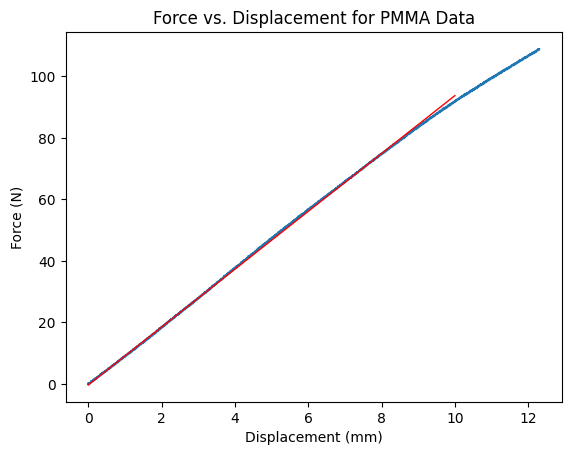

In [ ]:
pmma_displacements = np.array(pmma_displacements)
pmma_forces = np.array(pmma_forces)

safe_upper_bound = 3.7

linear_region_pmma = (pmma_displacements <= safe_upper_bound)
grad_pmma,intercept_pmma = np.polyfit(pmma_displacements[linear_region_pmma], pmma_forces[linear_region_pmma], 1)
print(grad_pmma,intercept_pmma)

E = (grad_pmma*(10**3))*((restraint_length**3)/(48*pmma_i))

print("Youngs Modulus in GPa: "+str(E))

xs = np.linspace(0, 10, 100)
ys = grad_pmma * xs + intercept_pmma

plt.plot(pmma_displacements, pmma_forces, marker='o', markersize=0.01, linestyle='-')
plt.plot(xs,ys, color='red', linewidth=1.0)
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.title("Force vs. Displacement for PMMA Data")


In [ ]:
resolution = 0.02

for point in range(0,len(pmma_displacements)):
  actual_value = grad_pmma*(pmma_displacements[point]) + intercept_pmma
  if (abs(actual_value-pmma_forces[point])/actual_value) >= resolution and pmma_displacements[point] > safe_upper_bound:
    print(actual_value, pmma_forces[point])
    print("Failure Displacement: "+str(pmma_displacements[point]))
    print("Failure Load: "+str(pmma_forces[point]))

    yield_stress = (pmma_forces[point]*pmma_length*pmma_height)*(10**-6)/(8*pmma_i)
    print("Yield Stress in MPa: "+str(yield_stress))

    break

92.3356983897078 90.4839
Failure Displacement: 9.8532
Failure Load: 90.4839
Yield Stress in MPa: 116005000.0
